# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv("data.csv")
data.head()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,1,0.38,0.53,2,157,3,0,0,low,1
1,2,0.80,0.86,5,262,6,0,0,medium,1
2,3,0.11,0.88,7,272,4,0,0,medium,1
3,4,0.72,0.87,5,223,5,0,0,low,1
4,5,0.37,0.52,2,159,3,0,0,low,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   empid                  14999 non-null  int64  
 1   satisfaction_level     14997 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 1.1+ MB


In [4]:
data.drop("empid",axis=1,inplace=True)

In [5]:
data.shape

(14999, 9)

In [6]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
count,14997.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612863,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.238083
std,0.248634,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.425924
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
categorical_features=[feature for feature in data.columns if data[feature].dtype=='O']
numerical_features=[feature for feature in data.columns if data[feature].dtype!='O']
descrete_numerical=[feature for feature in numerical_features if data[feature].unique().sum()<20]
continuous_numerical=[feature for feature in numerical_features if feature not in descrete_numerical]

In [8]:
print("categorical_features :",categorical_features)
print("\ndescrete_numerical :",descrete_numerical)
print("\ncontinuous_numerical :",continuous_numerical)

categorical_features : ['salary']

descrete_numerical : ['Work_accident', 'promotion_last_5years', 'left']

continuous_numerical : ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']


In [9]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,0.38,0.53,2,157,3,0,0,low,1
1,0.80,0.86,5,262,6,0,0,medium,1
2,0.11,0.88,7,272,4,0,0,medium,1
3,0.72,0.87,5,223,5,0,0,low,1
4,0.37,0.52,2,159,3,0,0,low,1


## Categorical Data

### 1. [left]

0    11428
1     3571
Name: left, dtype: int64

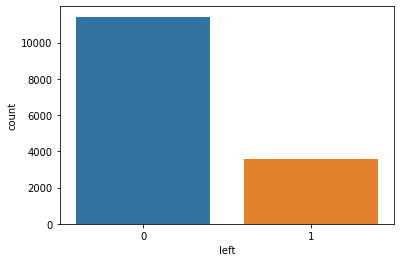

In [10]:
sns.countplot(data=data,x='left')
data['left'].value_counts()

In [11]:
# Take away : More no of Employees stayed than who left

### 2.[salary]

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

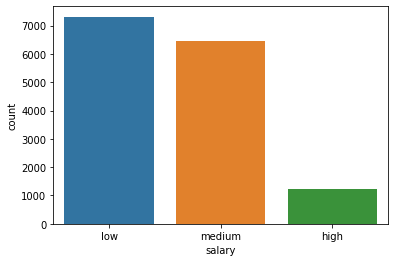

In [12]:
sns.countplot(x=data['salary'])
data['salary'].value_counts()

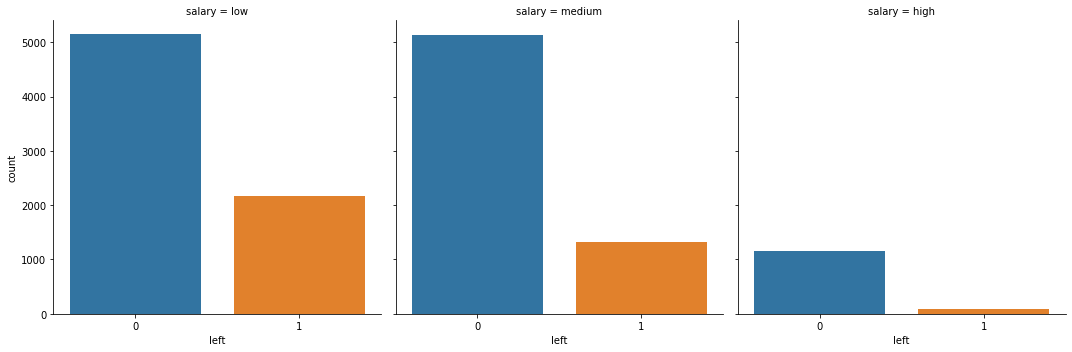

In [13]:
sns.catplot(x='left',col='salary',data=data,kind='count')

In [14]:
# Take away : most of the employees having low-medium salary level left and the high salaried ones retained

### 3. [promotion_last_5years]

0    14680
1      319
Name: promotion_last_5years, dtype: int64

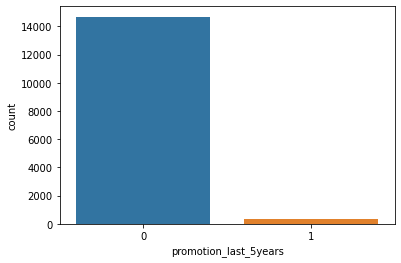

In [15]:
sns.countplot(x=data['promotion_last_5years'])
data['promotion_last_5years'].value_counts()

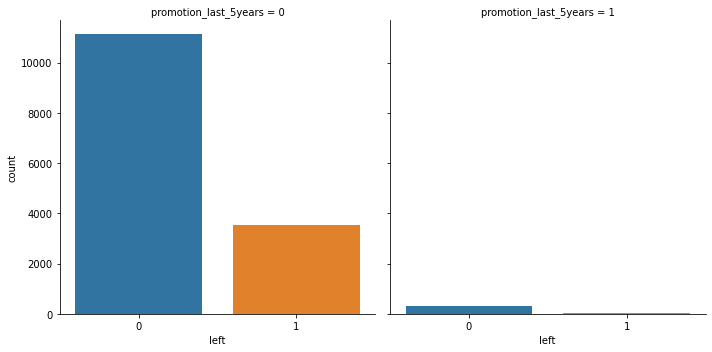

In [16]:
sns.catplot(x='left',col='promotion_last_5years',data=data,kind='count')

In [17]:
# Take away : most of the employees ain't promoted in last 5 years

### 4. [Work_accident]

0    12830
1     2169
Name: Work_accident, dtype: int64

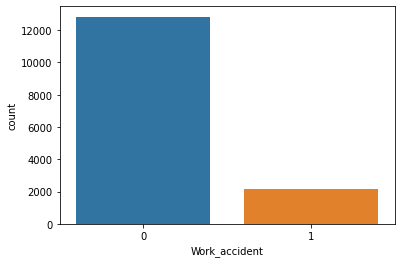

In [18]:
sns.countplot(x=data['Work_accident'])
data['Work_accident'].value_counts()

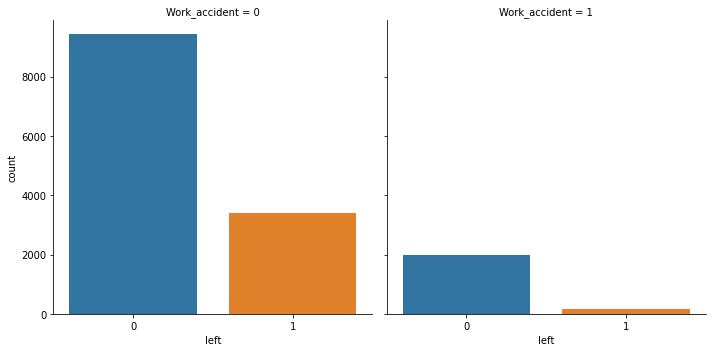

In [19]:
sns.catplot(x='left',col='Work_accident',data=data,kind='count')

In [20]:
# Take away : very less no. of Employees had Work_accidents

### 5. [time_spend_company]

Average Time spent in company :  3.498233215547703


3     6443
2     3244
4     2557
5     1473
6      718
10     214
7      188
8      162
Name: time_spend_company, dtype: int64

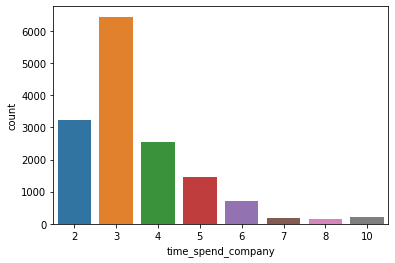

In [21]:
sns.countplot(x=data['time_spend_company'])
print("Average Time spent in company : ",data['time_spend_company'].mean())
data['time_spend_company'].value_counts()

<AxesSubplot:xlabel='left', ylabel='time_spend_company'>

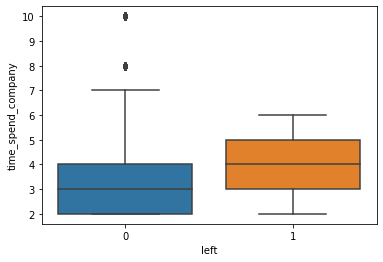

In [22]:
sns.boxplot(x='left',y='time_spend_company',data=data)

In [23]:
# Take away : most of the employees left after spending approx 3-5 years in the company

### 6. [number_project]

4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: number_project, dtype: int64

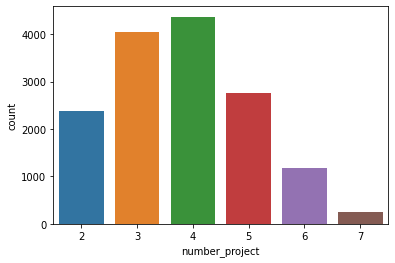

In [24]:
sns.countplot(x=data['number_project'])
data['number_project'].value_counts()

<AxesSubplot:xlabel='left', ylabel='number_project'>

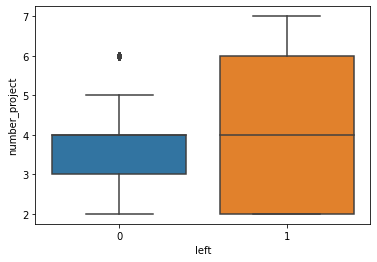

In [25]:
sns.boxplot(x='left',y='number_project',data=data)

In [26]:
# Take away : the employees who left tend to do more projects

## Continuous 

### 1 .[satisfaction_level]

average satisfaction level: 0.6128625725145028


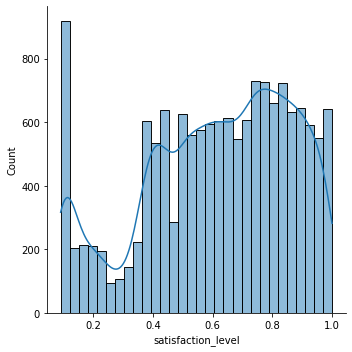

In [27]:
sns.displot(x=data['satisfaction_level'],kde=True)
print("average satisfaction level:",data['satisfaction_level'].mean())

<AxesSubplot:xlabel='left', ylabel='satisfaction_level'>

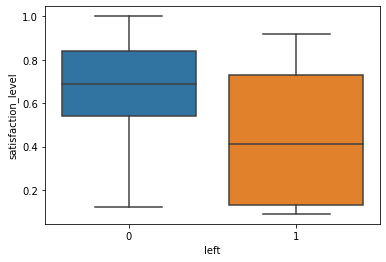

In [28]:
sns.boxplot(x='left',y='satisfaction_level',data=data)

In [29]:
#take-away : the employees who left has were less satisfied with the company

### 2 .[last_evaluation]

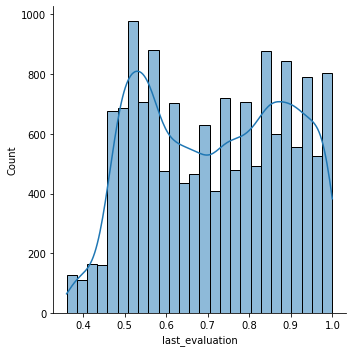

In [30]:
sns.displot(x=data['last_evaluation'],kde=True)

<AxesSubplot:xlabel='left', ylabel='last_evaluation'>

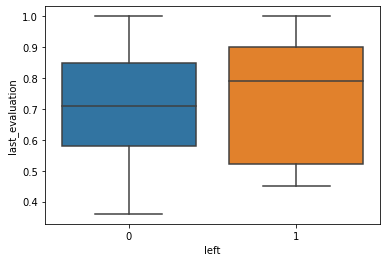

In [31]:
sns.boxplot(x='left',y='last_evaluation',data=data)

In [32]:
# take away : not much impact

### 3 .[average_montly_hours]

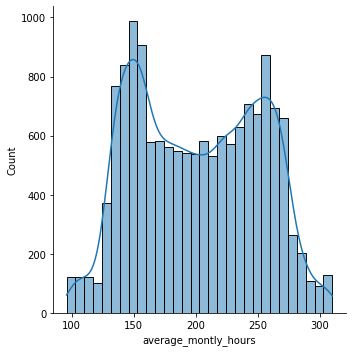

In [33]:
sns.displot(x=data['average_montly_hours'],kde=True)

<AxesSubplot:xlabel='left', ylabel='average_montly_hours'>

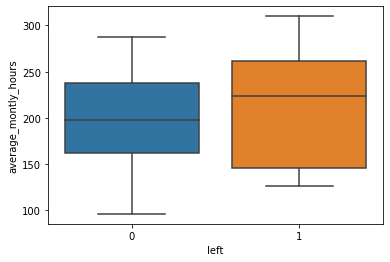

In [34]:
sns.boxplot(x='left',y='average_montly_hours',data=data)

In [35]:
# take away : the employees who left had high average monthly hour 

In [36]:
data.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
satisfaction_level,1.000000,0.104903,-0.143168,-0.020176,-0.100912,0.058653,0.025589,-0.388269
last_evaluation,0.104903,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684,0.006567
number_project,-0.143168,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064,0.023787
average_montly_hours,-0.020176,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544,0.071287
time_spend_company,-0.100912,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433,0.144822
Work_accident,0.058653,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245,-0.154622
promotion_last_5years,0.025589,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000,-0.061788
left,-0.388269,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788,1.000000


<AxesSubplot:>

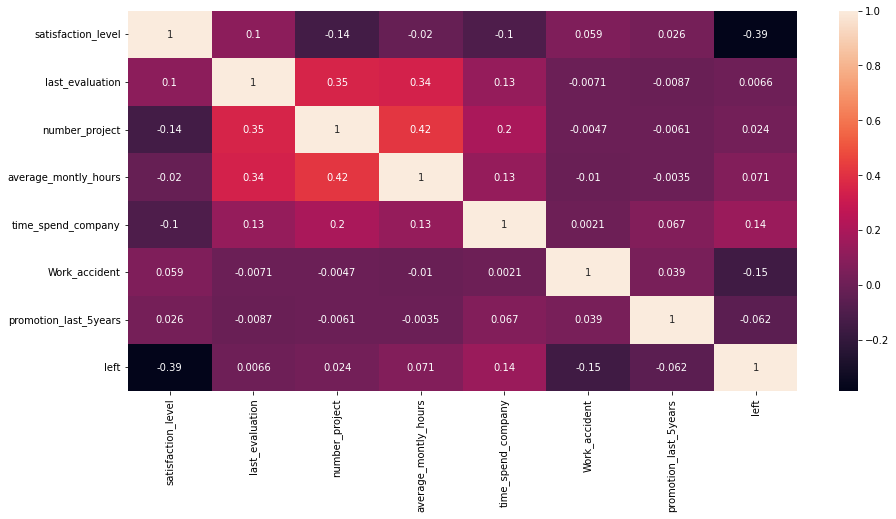

In [37]:
fig = plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True)

In [38]:
# take away : satisfaction level feature is correlated with target column left